## Project: Querying and Filtering Pokemon data

This project aims to improve my querying and filtering skills with pandas. Let's start!

### Task 0 - Setup

Library imports and csv reading

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Pokemon_dataset.csv")

### Small exploratory analysis

This phase is important to understand the data before manipulating it.

In [2]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [4]:
df.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


#### Distribution of Pokemon Types:

<AxesSubplot: ylabel='count'>

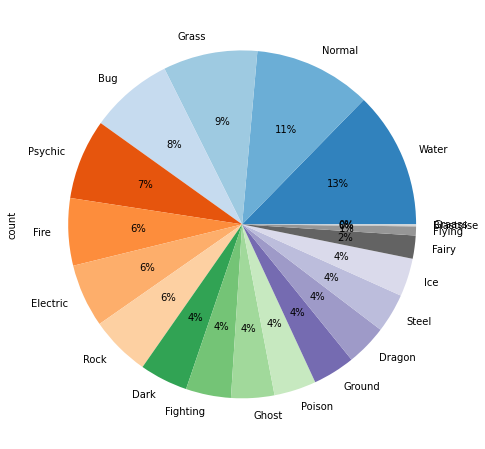

In [5]:
df['type1'].value_counts().plot(kind='pie', autopct='%1.0f%%', cmap='tab20c', figsize=(10, 8))

#### Distribution of Pokemon Totals:

<AxesSubplot: ylabel='Frequency'>

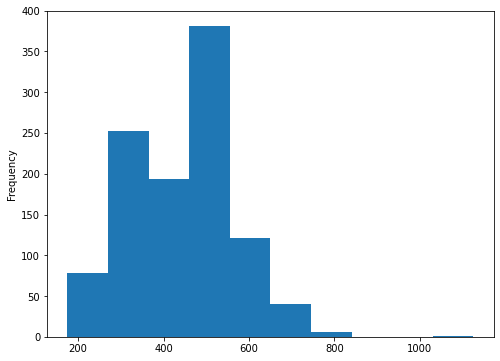

In [6]:
df['total'].plot(kind='hist', figsize=(8, 6))

<AxesSubplot: >

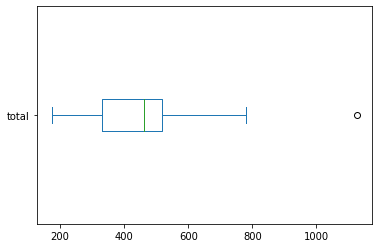

In [7]:
df['total'].plot(kind='box', vert=False, figsize=(6, 4))

#### Distribution of Legendary Pokemons:

<AxesSubplot: ylabel='count'>

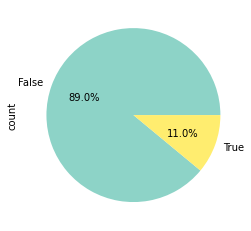

In [8]:
df['legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(6, 4))

### Basic filtering

Let's start with a few simple activities regarding filtering.

##### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<AxesSubplot: xlabel='attack'>

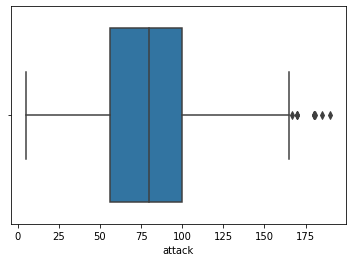

In [9]:
sns.boxplot(data=df, x='attack')

In [10]:
df.query("`attack` > 150").shape

(24, 13)

In [11]:
# or
df.loc[(df['attack'] > 150)].shape

(24, 13)

In [12]:
# or
(df['attack'] > 150).value_counts()

attack
False    1048
True       24
Name: count, dtype: int64

In [13]:
# or
(df['attack'] > 150).sum()

24

##### r: 24

##### 2. Select all pokemons with a Speed of `10` or less


In [14]:
slow_pokemons_df = df.query("`speed`<= 10")

# Or --> slow_pokemons_df = df.loc[df['speed'] <= 10]

slow_pokemons_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
272,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
404,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
531,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
540,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
708,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
909,771,Pyukumuku,Water,NaN,410,55,60,130,30,130,5,7,False
977,829,Gossifleur,Grass,NaN,250,40,40,60,40,60,10,8,False


##### 3. How many Pokemons have a `Sp. Defense` value of 25 or less?

In [15]:
(df['sp_defense'] <= 25).sum()

20

In [16]:
df.loc[df['sp_defense'] <= 25]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
16,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
17,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
20,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
21,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
56,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
126,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
136,98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
159,116,Horsea,Water,NaN,295,30,40,70,70,25,60,1,False
174,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
229,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False


####  r: 20

##### 4. Select all the Legendary pokemons

In [17]:
legendary_df = df.loc[df['legendary'] == True]

legendary_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
194,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
195,144,Galarian Articuno,Psychic,Flying,580,90,85,85,125,100,95,8,True
196,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
197,145,Galarian Zapdos,Fighting,Flying,580,90,125,90,85,90,100,8,True
198,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


##### 5. Find the outlier

Find the pokemon that is clearly an outlier in terms of Attack / Defense:

Text(150, 10, "Who's this guy?")

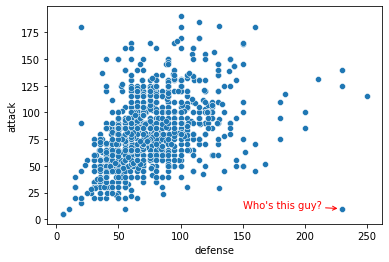

In [18]:
ax = sns.scatterplot(data=df, x="defense", y="attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [19]:
df.sort_values(by=['defense', 'attack'], ascending=[False, True]).head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1057,890,Eternamax Eternatus,Poison,Dragon,1125,255,115,250,125,250,130,8,True
272,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
266,208,Mega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
378,306,Mega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
947,805,Stakataka,Rock,Steel,570,61,131,211,53,101,13,7,False


#### Insights

* By default, the columns are in ascending order

* Through the scatter plot, it is possible to notice that the Pokémon has a very high defense and a very low attack.

* Solution:
    * I filtered the defense column in descending order, meaning with the highest defense values.
    * I filtered the attack column in ascending order, meaning with the lowest values.

#### r: Shuckle	

### Advanced selection

Now let's use boolean operators to create more advanced expressions

##### 6. How many Fire-Flying Pokemons are there?


In [20]:
df.query("`type1` == 'Fire' and  `type2` == 'Flying'").shape

# or df.loc[(df['type1'] == 'Fire') & (df['type2'] == 'Flying')].shape

(8, 13)

#### r: 8

##### 7. How many 'Poison' pokemons are across both types?


In [21]:
(df['type1'] == 'Poison').sum()

42

In [22]:
(df['type2'] == 'Poison').sum()

41

In [23]:
# or
df.loc[(df['type1'] == 'Poison') | (df['type2'] == 'Poison')].shape

# df.query("`type1` == 'Poison' or `type2` == 'Poison'").info()

(83, 13)

#### r: 83

##### 8. What pokemon of `Type 1` *Ice* has the strongest defense?

In [24]:
df.loc[
    (df['type1']=='Ice') &
    (df['defense'] == df.loc[df['type1'] == 'Ice', 'defense'].max())
]

# or

# df.loc[df['type1'] == 'Ice'].sort_values(by=['defense'], ascending=[False])

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
841,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


#### r: Avalugg

##### 9. What's the most common type of Legendary Pokemons?

<AxesSubplot: xlabel='type1'>

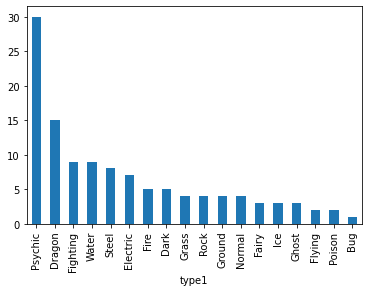

In [25]:
df.loc[df['legendary'], 'type1',].value_counts().plot(kind='bar')

#### r: Psychic

##### 10. What's the most powerful pokemon from the first 3 generations, of type water?


In [26]:
df.loc[
    (df['type1'] == 'Water') & 
    (df['generation'].isin([1,2,3])) &
    (df['total'] == df.loc[df['type1'] == 'Water', 'total'].max())
]

# or

# df.loc[
#     (df['type1'] == 'Water') & 
#     (df['generation'].isin([1,2,3]))
# ].sort_values(by=['defense'], ascending=[False]).head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
467,382,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True


#### r: Primal Kyogre


##### 11. What's the most powerful Dragon from the last two generations?


In [41]:
df.loc[
    ((df['type1'] == 'Dragon') | (df['type2'] == 'Dragon')) &
    (df['generation'].isin({5,6}))
].sort_values(by=['total'], ascending=[False]).head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
848,718,Zygarde Complete Forme,Dragon,Ground,708,216,100,121,91,95,85,6,True
762,646,Black Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
763,646,White Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
757,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
758,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True


#### r: Zygarde Complete Forme	

##### 12. Select most powerful Fire-type pokemons
* Select all pokemons that have an attack value above 100 and type1 equals to fire (ignore type2)


In [45]:
powerful_fire_df = df.loc[(df['type1'] == 'Fire') & (df['attack'] > 100)].head()
powerful_fire_df


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
8,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
9,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
82,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
184,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
306,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True


##### 13. Select all Water-type, Flying-type pokemons

* Select those pokemons that are of type1 water and type2 flying. Store de selection in the variable water_flying_df.

In [48]:
water_flying_df = df.query("`type1` == 'Water' and `type2`== 'Flying'").head()
water_flying_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
175,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
287,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
346,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
347,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
553,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False


##### 14. Select specific columns of Legendary pokemons of type Fire
* Perform a selection in your dataframe of all the legendary pokemons that are of type1 fire. But select only the columns name, attack and generation. Store de selection in the variable legendary_fire_df.

In [58]:
legendary_fire_df = df.loc[
    ((df['legendary']) & (df['type1'] == 'Fire')), ['name', 'attack', 'generation']]
legendary_fire_df

,name,attack,generation
198,Moltres,100,1
306,Entei,115,2
313,Ho-oh,130,2
587,Heatran,90,4
853,Volcanion,110,6


##### 15. Select Slow and Fast pokemons

This is the distribution of speed of the pokemons. The red lines indicate those bottom 5% and top 5% pokemons by speed:


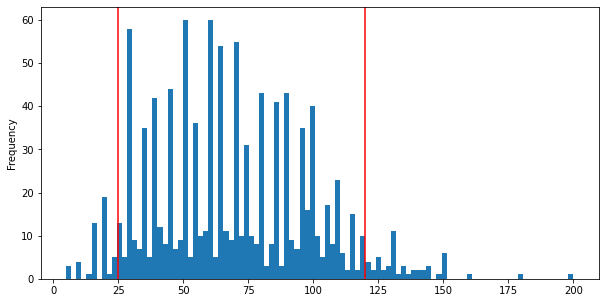

In [60]:
ax = df['speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['speed'].quantile(.05), color='red')
ax.axvline(df['speed'].quantile(.95), color='red')

In [62]:
bottom_5 = df['speed'].quantile(.05)
top_5 = df['speed'].quantile(.95)

(bottom_5, top_5)

(25.0, 120.0)

In [68]:
slow_fast_df = df.loc[
    (df['speed'] < 25) |
    (df['speed'] > 120)
].head()

slow_fast_df

# df.query("speed < @bottom_5 or speed > @top_5")

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
23,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
27,18,Mega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
56,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
89,65,Mega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
99,74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False


##### 16. Find the Ultra Powerful Legendary Pokemon

Text(160, 150, "Who's this guy?")

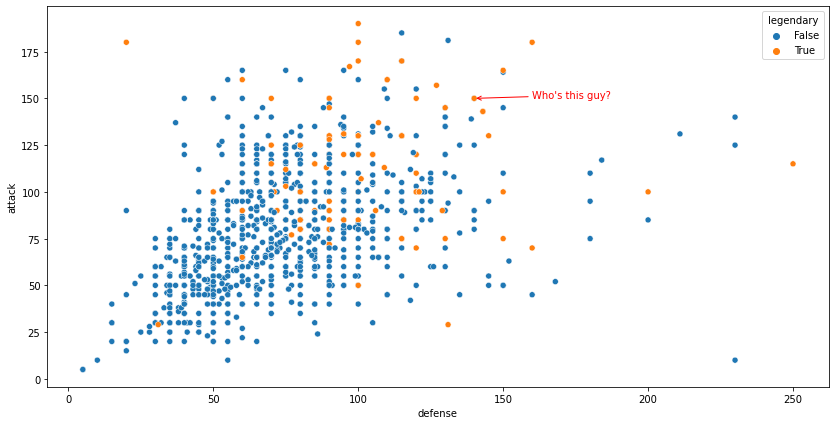

In [71]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="defense", y="attack", hue='legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(140, 150), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [80]:
df.loc[(df['legendary']) & (df['attack'] <= 160)].sort_values(by=['attack', 'defense'], ascending=False).head(10)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
588,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True
850,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
852,720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
940,800,Dusk Mane Necrozma,Psychic,Steel,680,97,157,127,113,109,77,7,True
468,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True
758,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
467,382,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
470,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
205,150,Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
473,386,Deoxys Normal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True


#### r: Groudon

### The end